# Semi-Supervised Deep Learning for Melanoma Detection

## Workflow

* Setting up your development environment (GPU will only be used/activated if performance requires it)
* Write “Hello World” of deep learning: train a handwritten digit classifier using PyTorch( > 95 % accuracy ) . 

### CODE: Imports for the notebook

In [1]:
import time
import torch
import torchvision
import numpy
import matplotlib.pyplot as plt
from IPython.core.display import HTML # just to format some outputs 

import google.colab   # Accessing and Saving data, I hope

### CODE: Constants

In [2]:
BASE_DIR = '/content/drive/My Drive/05_Colab'  # Dont' forget to "Mount" drive
NETWORK_FILE_NAME = 'submission_001'  # Filename for Network to save

### CODE: Functions

In [3]:
def runTestOnModel(model):
  """tests the passed model and returns the error-number-count"""

  testImagesCount = 0
  correctPredictions = 0
  errorProneNumbers = numpy.zeros(10)
  
  for images, labels in testLoader:
    for idx in range(len(labels)):
      img = images[idx].view(1, 784)
      with torch.no_grad():
        logps = model(img)

      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      predictedValue = probab.index(max(probab))
      currentValue = labels.numpy()[idx]
    
      if predictedValue == currentValue:
        correctPredictions += 1
      else:
        errorProneNumbers[currentValue] += 1
      testImagesCount += 1

  print(f"Tested images: {testImagesCount}")
  print(f"Correct predicted: {correctPredictions} / {testImagesCount}\n")
  print(f"Accuracy: {round((correctPredictions/testImagesCount) * 100, 2)}%")
  return errorProneNumbers


def trainModel(model, epochs, lr=0.003, momentum=0.9):
  """train model and returns losses and duration."""

  losses = []
  criterion = torch.nn.NLLLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

  startTime = time.time()
  print('Start Training:')
  print('===============\n')
  for e in range(epochs):
    lossHelper = 0
    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        lossHelper += loss.item()
    losses.append(lossHelper)
    print(f"Epoch {e+1}/{epochs} Training loss: {lossHelper/len(trainLoader)}")

  training_time = (time.time()-startTime)/60
  print(f"\nTraining Time: {training_time}",)
  return (losses, training_time)

### CODE: Load Data

In [4]:
transform = torchvision.transforms.Compose([
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize((0.5), (0.5))])

trainData = torchvision.datasets.MNIST(root = BASE_DIR, train = True, transform = transform, download = False)

testData = torchvision.datasets.MNIST(root = BASE_DIR, train = False, transform = transform, download = False)

trainLoader = torch.utils.data.DataLoader(trainData, batch_size=64, shuffle=True)
testLoader = torch.utils.data.DataLoader(testData, batch_size=64, shuffle=True)

### CODE: Data Exploration


Images Info:
torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])

Labels Info:
torch.Size([64])
tensor(8)


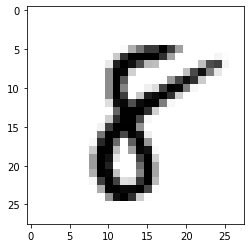

In [5]:
dataIter = iter(trainLoader)
images, labels  = dataIter.next()

print('\nImages Info:')
print(images.shape)
print(images[0].shape)
print(images[0][0].shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

print('\nLabels Info:')
print(labels.shape)
print(labels[0])


### CODE: Setup Network ( 784 -> 128 -> 64 -> 10)

In [6]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes[0]),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes[1], output_size),
                      torch.nn.LogSoftmax(dim=1))
print('Model:')
print('======\n')
print(model)

Model:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


### CODE: Alternate Network ( 784 -> 100 -> 10)
_(should manage the > 95% accuracy)_

In [7]:
input_size = 784
hidden_size = 100
output_size = 10

model_alt = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_size),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_size, output_size),
                      torch.nn.LogSoftmax(dim=1))
print('Alt Model:')
print('==========\n')
print(model_alt)

Alt Model:

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


### CODE: Train Network 10 Epochs

In [8]:
epochs = 10
print("BASE MODEL")
baseLosses, baseTime = trainModel(model, epochs)

print("\nALTERNATE MODEL")
altLosses, altTime = trainModel(model_alt, epochs)

BASE MODEL
Start Training:

Epoch 1/10 Training loss: 0.6429814805211161
Epoch 2/10 Training loss: 0.28018789743182504
Epoch 3/10 Training loss: 0.21669105700115915
Epoch 4/10 Training loss: 0.17457738250636978
Epoch 5/10 Training loss: 0.14621461348544593
Epoch 6/10 Training loss: 0.1247110026163746
Epoch 7/10 Training loss: 0.11071595746173915
Epoch 8/10 Training loss: 0.09754420173014881
Epoch 9/10 Training loss: 0.08741764041251623
Epoch 10/10 Training loss: 0.07991034944287574

Training Time: 1.4068771163622538

ALTERNATE MODEL
Start Training:

Epoch 1/10 Training loss: 0.5226407608847374
Epoch 2/10 Training loss: 0.2930029998900794
Epoch 3/10 Training loss: 0.24159373179364052
Epoch 4/10 Training loss: 0.2047937850215669
Epoch 5/10 Training loss: 0.17709516282322438
Epoch 6/10 Training loss: 0.1549118324053853
Epoch 7/10 Training loss: 0.1380007067151161
Epoch 8/10 Training loss: 0.1247956916086201
Epoch 9/10 Training loss: 0.11281966391815813
Epoch 10/10 Training loss: 0.1030799

### CODE: Test Network

Manual Test:
Predicted Digit:  5
Real Current Digit: 5


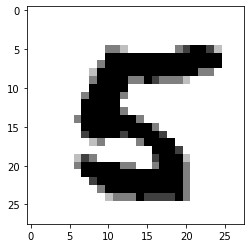

In [9]:
images, labels = next(iter(testLoader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Manual Test:")
print("============")
print("Predicted Digit: ", probab.index(max(probab)))
print("Real Current Digit:", labels.numpy()[0])
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');


### CODE: Evaluate Network __(with whole test-set)__

In [10]:
print("Evaluate Base Model:")
print("=======================")

error = runTestOnModel(model)

print("\n\nEvaluate Alternate Model:")
print("=======================")
error_alt = runTestOnModel(model_alt)

print(f"\nTraining time(in Min) base: {baseTime} vs alternate: {altTime}")

Evaluate Base Model:
Tested images: 10000
Correct predicted: 9664 / 10000

Accuracy: 96.64%


Evaluate Alternate Model:
Tested images: 10000
Correct predicted: 9657 / 10000

Accuracy: 96.57%

Training time(in Min) base: 1.4068771163622538 vs alternate: 1.3643073598543802


### CODE: Display some extra Metrics

Visualizies where errors occure


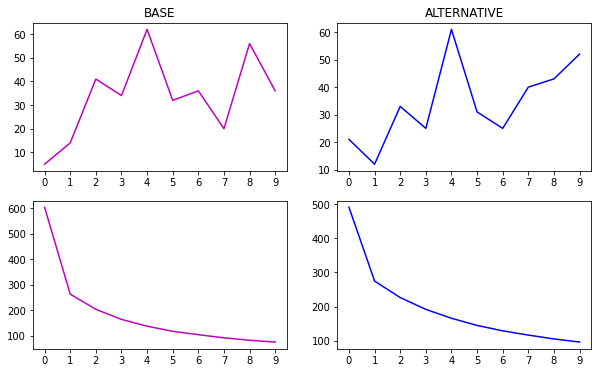

In [11]:
print("Visualizies where errors occure");
print("===============================");
plt.figure(figsize=(10,6))

x = range(10)
x1 = range(len(baseLosses))

plt.subplot(221)
plt.xticks(x)
plt.title("BASE");
plt.plot(x, error,  color='m')
plt.subplot(222)
plt.xticks(x)
plt.title("ALTERNATIVE");
plt.plot(x, error_alt, color='b')
plt.subplot(223)
plt.xticks(x1)
plt.plot(x1, baseLosses,  color='m')
plt.subplot(224)
plt.xticks(x1)
plt.plot(x1, altLosses,  color='b')


### CODE: Save Good Network

In [12]:
#@title Filename for saving

filename = 'submission_001.pt' #@param {type:"string"}
#filename = filename.strip()
#filename = filename if len(filename) > 0 else NETWORK_FILE_NAME
#torch.save(model, f'{BASE_DIR}/{filename}') 
#print('Networt was Saved!')